__Preprocess 5: - Positions (Optional)__

In this tool we mark positions on a multiply imaged strongly lensed source corresponding to a set positions / pixels 
which are anticipated to trace to the same location in the source-plane.

A non-linear sampler uses these positions to discard the mass-models where they do not trace within a threshold of
one another, speeding up the analysis and removing unwanted solutions with too much / too little mass.

If you create positions for your dataset, you must also update your runner to use them by loading them, passing them
to the pipeline run function and setting a `positions_threshold` in the pipelines.

See `autolens_workspace/notebooks/imaging/modeling/customize/positions.py` for an example.

Positions are optional, if you struggling to get PyAutoLens to infer a good model for your dataset and you haev
not tried positons yet I recommend that you do.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

#%matplotlib inline
from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


The path where positions are output, which is `dataset/imaging/no_lens_light/mass_sie__source_sersic`

In [2]:
dataset_type = "imaging"
dataset_label = "no_lens_light"
dataset_name = "mass_sie__source_sersic"
dataset_path = path.join("dataset", dataset_type, dataset_label, dataset_name)

If you use this tool for your own dataset, you *must* double check this pixel scale is correct!

In [3]:
pixel_scales = 0.1

First, load the `Imaging` dataset, so that the positions can be plotted over the strong lens image.

In [4]:
image = al.Array2D.from_fits(
    file_path=path.join(dataset_path, "image.fits"), pixel_scales=pixel_scales
)

Now, create a set of positions, which is a Coordinate of (y,x) values.

In [5]:
positions = al.Grid2DIrregular(
    grid=[(0.4, 1.6), (1.58, -0.35), (-0.43, -1.59), (-1.45, 0.2)]
)

Now lets plot the image and positions, so we can check that the positions overlap different regions of the source.

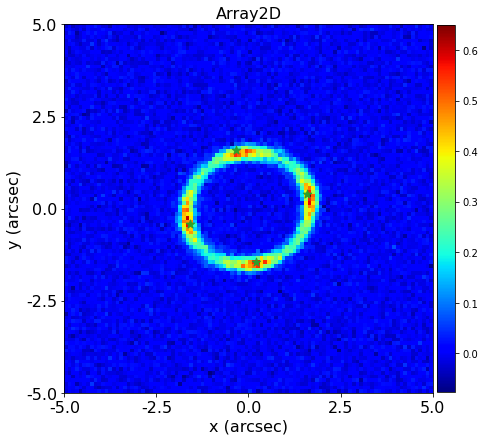

In [6]:
visuals_2d = aplt.Visuals2D(positions=positions)

array_plotter = aplt.Array2DPlotter(array=image, visuals_2d=visuals_2d)
array_plotter.figure()

Now we`re happy with the positions, lets output them to the dataset folder of the lens, so that we can load them from a
.json file in our pipelines!

In [7]:
positions.output_to_json(
    file_path=path.join(dataset_path, "positions.json"), overwrite=True
)

Finished.